In [ ]:
import pyautogui as pg
import kociemba

### 获取魔方数据

#### 读取数据

In [ ]:
center = pg.position()
print(center)

In [ ]:
left_top = pg.position()
print(left_top)

In [ ]:
right_top = pg.position()
print(right_top)

In [ ]:
bottom = pg.position()
print(bottom)

In [ ]:
height = bottom[1] - center[1]
print(height)

In [ ]:
width = center[0] - left_top[0]
print(width)

In [ ]:
length = center[1] - left_top[1] 
print(length)

In [ ]:
width = right_top[0] - center[0]
print(width)

In [ ]:
length = center[1] - right_top[1] 
print(length)

In [ ]:
behind = pg.position()
print(behind)

In [ ]:
print(center[1] - behind[1])

#### 数据总结

1. 竖边长度 height = 246
2. 斜边相对位置：
   - 水平距离 208
   - 垂直距离 121
3. 注意到界面可能存在等比例放缩，也可以表述为比例数据
   - 正面高度 1
   - 水平距离 208/246
   - 垂直距离 122/246

实际计算时，像素点需取为整数。

#### 图像标尺

1. 三条基本边
   ![20220127151952](https://cdn.jsdelivr.net/gh/zhihongecnu/PicBed/picgo/20220127151952.png)

2. 三个基本方向
   ![20220127153950](https://cdn.jsdelivr.net/gh/zhihongecnu/PicBed/picgo/20220127153950.png)

#### 数据计算
center 和 l1 是必要数据

In [ ]:
import numpy as np

In [ ]:
center = np.array([535, 662])
print("中心点为：", center)

In [ ]:
l1 = 246
l2, l3 = l1 * 208 // 246, l1 * 122 // 246
print("三个基本长度，下，左，后分别为", l1, l2, l3)

In [ ]:
right = np.array([l2, -l3]) // 3
left = np.array([-l2, -l3]) // 3
down = np.array([0, l1]) // 3
print("三个基本方向，左，右，下分别为", left, right, down)

In [ ]:
red_origin = center + (left + down) // 2
blue_origin = center + (right + down) // 2
white_origin = center + (left + right) // 2
print("三个基本起点，红，蓝，白分别为",red_origin, blue_origin, white_origin)

In [ ]:
reds = [[red_origin + (2 - i) * left + j * down for i in range(3)] for j in range(3)]
blues = [[blue_origin + i * right + j * down for i in range(3)] for j in range(3)]
whites = [[white_origin + (2 - i) * left + j * right for i in range(3)]for j in range(3)]

#### 数据检验

In [ ]:
import time

In [ ]:
### 检验中心点和三条边
time.sleep(0.2)
pg.moveTo(list(center))
print("当前在中心点")

time.sleep(0.2)
pg.moveTo(list(center + 3 * right))
print("当前在左边")

time.sleep(0.2)
pg.moveTo(list(center + 3 * left))
print("当前右边")

time.sleep(0.2)
pg.moveTo(list(center + 3 * down))
print("当前在下边")

In [ ]:
### 检验三个方向
time.sleep(0.2)
pg.moveTo(list(center + right))
print("当前在左边")

time.sleep(0.2)
pg.moveTo(list(center + left))
print("当前右边")

time.sleep(0.2)
pg.moveTo(list(center + down))
print("当前在下边")

In [ ]:
## 检验起点位置
time.sleep(0.2)
pg.moveTo(list(red_origin))
print("红色起点")

time.sleep(0.2)
pg.moveTo(list(blue_origin))
print("蓝色起点")

time.sleep(0.2)
pg.moveTo(list(white_origin))
print("白色起点")

In [ ]:
# 检验魔方各点位置
print("检验红色位置")
for line in reds:
    for p in line:
        time.sleep(0.2)
        pg.moveTo(list(p))
time.sleep(0.5)
print("检验蓝色位置")
for line in blues:
    for p in line:
        time.sleep(0.2)
        pg.moveTo(list(p))
time.sleep(0.5)
print("检验白色位置")
for line in whites:
    for p in line:
        time.sleep(0.2)
        pg.moveTo(list(p))

### 初始化代码

In [1]:
import numpy as np
import pyautogui as pg
import kociemba as kb

In [103]:
# 获取中心点和下顶点
standard = False # 默认按标准位置（左侧）
if standard:
    center = np.array([535, 662])
    l1 = 246
else: # 否则要求输入两个特定位置
    input("按回车录入中心点位置")
    center = np.array(pg.position())
    input("按回车录入底部位置")
    bottom = np.array(pg.position())
    l1 = bottom[1] - center[1]
l2, l3 = l1 * 208 // 246, l1 * 122 // 246

按回车录入中心点位置
按回车录入底部位置


In [104]:
# 初始化 27 个小面位置
left, right, down = [np.array(p) //3 for p in [[-l2, -l3], [l2, -l3], [0, l1]]]
red_origin, blue_origin, white_origin = [center + i // 2 for i in [left + down, right + down, left + right]]
reds = [[red_origin + (2 - i) * left + j * down for i in range(3)] for j in range(3)]
blues = [[blue_origin + i * right + j * down for i in range(3)] for j in range(3)]
whites = [[white_origin + (2 - i) * left + j * right for i in range(3)]for j in range(3)]

In [105]:
# 检验位置正确性
for facets in [reds, blues, whites]:
    for line in facets:
        for p in line:
            time.sleep(0.2)
            pg.moveTo(list(p))

In [18]:
# 封装函数
import numpy as np
import pyautogui as pg
import time
def cube_initialize(standard: bool = True):
    if standard:
        center = np.array([535, 662])
        l1 = 246
    else: # 否则要求输入两个特定位置
        input("按回车录入中心点位置")
        center = np.array(pg.position())
        input("按回车录入底部位置")
        bottom = np.array(pg.position())
        l1 = bottom[1] - center[1]
    l2, l3 = l1 * 208 // 246, l1 * 122 // 246
    left, right, down = [np.array(p) //3 for p in [[-l2, -l3], [l2, -l3], [0, l1]]]
    red_origin, blue_origin, white_origin = [center + i // 2 for i in [left + down, right + down, left + right]]
    reds = [[red_origin + (2 - i) * left + j * down for i in range(3)] for j in range(3)]
    blues = [[blue_origin + i * right + j * down for i in range(3)] for j in range(3)]
    whites = [[white_origin + (2 - i) * left + j * right for i in range(3)]for j in range(3)]
    return reds, blues, whites
def check_positions(facets):
    for line in facets:
        for p in line:
            time.sleep(0.2)
            pg.moveTo(list(p))

In [120]:
reds, blues, whites = cube_initialize(standard=False)

按回车录入中心点位置
按回车录入底部位置


In [145]:
check_positions(reds)

In [97]:
check_positions(blues)

In [140]:
check_positions(whites)

### 图像识别

In [150]:
# 上，左，右-三面的颜色信息
white = (252, 244, 252), (222, 215, 222), (198, 192, 198)
red = (236, 56, 35), (208, 50, 30),(186, 44, 27)
blue = (64, 168, 198),(56, 148, 174),(51, 132, 155)
green = (128, 200, 55),(113, 176, 49),(101, 157, 44)
orange = (252, 138, 10),(222, 122, 9),(198, 109, 8)
yellow = (252, 237, 71),(222, 208, 63),(198, 186, 56)

In [ ]:
im = pg.screenshot()


### 基本操作

In [ ]:
kociemba.solve('UBRLUFFUBLRUFRLLLRDBDRFDBBUDDBUDDLRFBFLDLBFFRFLRUBRDUU')

In [118]:
{"white":(222, 215, 222), "red":

(252, 236, 71)

In [148]:
for line in blues:
    for p in line:
        p = tuple(int(i) for i in p)
        print(im.getpixel(p))

(198, 186, 56)
(101, 157, 44)
(198, 109, 8)
(51, 132, 155)
(198, 109, 8)
(186, 44, 27)
(186, 44, 27)
(186, 44, 27)
(198, 109, 8)


In [119]:
p = tuple(int(i) for i in white_origin)
im.getpixel(p)

(252, 236, 71)

In [109]:
p = [int(i) for i in red_origin]
im.load()[p[0],p[1]]

(222, 122, 9)

In [108]:
p = [int(i) for i in blue_origin]
im.load()[p[0],p[1]]

(51, 133, 156)

In [7]:
# 需要安装 scrot
im = pg.screenshot()

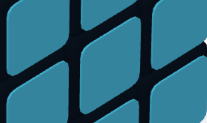

In [33]:
# left, upper, right ,lower
im.crop((region[0], region[1], region[2] + region[0], region[3] + region[1]))

In [37]:
??pg.pixelMatchesColor

In [11]:
center = np.array([535, 662])

In [32]:
region = [center[0],center[1],3*right[0], -3*right[1]]

In [31]:
right[1]

-41

In [ ]:
pg.pixel(list(center),list(red_origin))